<a href="https://colab.research.google.com/github/Aafaaq77/EinblickeMachineLearning/blob/main/Projektaufgabe%20-%20Teil%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projektaufgabe - Teil 1 (Abgabe am 31. Mai)

Bearbeiten Sie die unten stehenden Teilaufgaben (A-D). Teilaufgabe E ist eine Bonusaufgabe. Formulieren Sie zu jeder Teilaufgabe 1-2 Sätze (Was beobachte ich? Was schließe ich daraus?)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Datensatz einlesen

In [2]:
data = pd.read_csv("data/titanic.csv") 

In [3]:
#Sichtung der Daten anhand der ersten 5 Einträge
data.head()

,PassengerId,Pclass,Sex,Age,Fare,Survived
0,1,3,male,22.0,7.2500,False
1,2,1,female,38.0,71.2833,True
2,3,3,female,26.0,7.9250,True
3,4,1,female,35.0,53.1000,True
4,5,3,male,35.0,8.0500,False


### Datensatz erkunden

##### Teilaufgabe A: Erkunden Sie den Datensatz anhand der describe-Funktion und 2-3 geeigneter Visualisierungen

In [4]:
data.describe() #code

,PassengerId,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208
std,257.353842,0.836071,14.526497,49.693429
min,1.000000,1.000000,0.420000,0.000000
25%,223.500000,2.000000,20.125000,7.910400
50%,446.000000,3.000000,28.000000,14.454200
75%,668.500000,3.000000,38.000000,31.000000
max,891.000000,3.000000,80.000000,512.329200


In [5]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
data.shape

(891, 6)

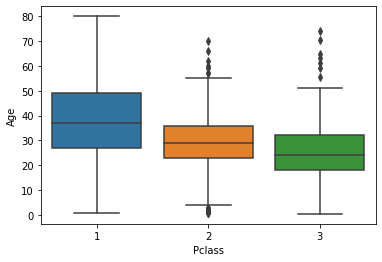

In [7]:
sns.boxplot(x='Pclass', y='Age', data=data)

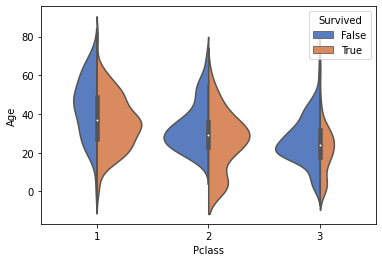

In [8]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data,
               palette="muted", split=True, scale='count')

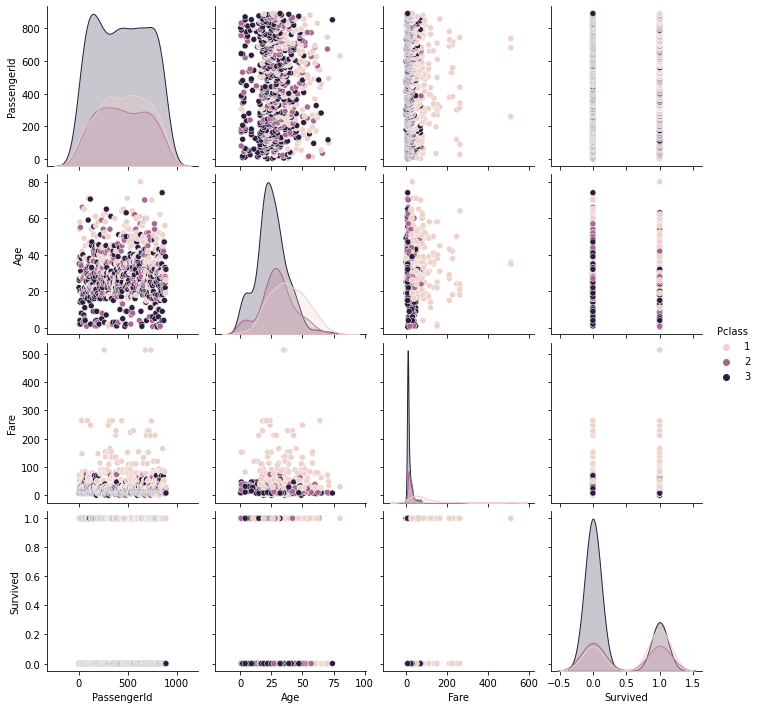

In [9]:
sns.pairplot(data, hue='Pclass')

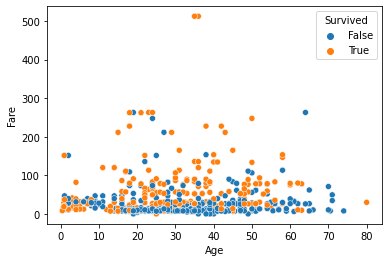

In [10]:
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived')

Fazit: Ich beobachte, dass in der Passenger-Klasse 1 im Durchschnitt mehr ältere Menschen sind und in der Klasse 3 sind es im Durchschnitt mehr jüngere Menschen. Das Verhältnis der überlebendenden ist in der Klasse 1 und in der Klasse2 besser obwohl es in der Klasse 3 die meisten Menschen sind.
Es ist auch keine deutliche Korrelation zwischen zwei beliebigen Merkmalen zu sehen.

### Datentypen 

##### Teilaufgabe B: Welche Datentypen liegen vor? Was muss hier gemacht werden?

In [11]:
data.dtypes #code

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Survived          bool
dtype: object

Fazit: Man kann für die Spalte 'Age' den Datentyp Int wählen um Speicher zu sparen, da es nicht nötig ist das Alter als float zu speichern. Die Spalte 'Sex' sollte man auch durch one-hot coding umformen und die Werte 1 und 0 z.B.verwenden.


### Fehlende Werte

##### Teilaufgabe C: Identifizieren Sie fehlende Werte und ersetzen Sie diese durch den Median.

In [12]:
data.isnull().sum() #code

PassengerId      0
Pclass           0
Sex              0
Age            177
Fare             0
Survived         0
dtype: int64

In [13]:
data['Age'].fillna(np.nanmedian(data['Age']), inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Survived       0
dtype: int64

In [15]:
data[data['Fare'] == 0].count()

PassengerId    15
Pclass         15
Sex            15
Age            15
Fare           15
Survived       15
dtype: int64

Fazit: Es gab viele fehlende Werte in der 'Age' Spalte, die durch Median erstetzt wurden. Außerdem gibt es auch in der Spalte 'Fare' die gleich Null sind.

### Auffällige Werte erkennen

##### Teilaufgabe D: Gibt es Ausreißer? Wie erkennen Sie diese? (Ersetzen nicht notwendig, aber 2-3 Sätze zur Einschätzung eventueller Ausreißer)

In [26]:
data[data['Age'] > data['Age'].quantile(0.95)].count()
# sind das alle Ausreißer? 

PassengerId    42
Pclass         42
Sex            42
Age            42
Fare           42
Survived       42
dtype: int64

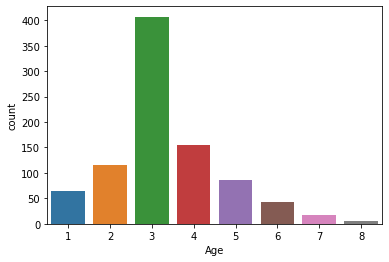

In [34]:
labels = [1, 2, 3, 4 ,5, 6, 7, 8]
sns.countplot(x=pd.cut(data['Age'], labels= labels, bins=len(labels)))

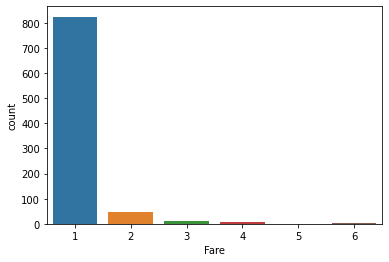

In [36]:
labels = [1, 2, 3, 4 ,5, 6]
sns.countplot(x=pd.cut(data['Fare'], labels= labels, bins=len(labels)))

Fazit: Ich beobachte, dass es in der Spalte 'Fare' starke Ausreißer gibt, die weitere Analysen beeinflussen können.

### Bonusaufgabe: Auswahl von Daten

##### Teilaufgabe E: Welche Korrelation beobachten Sie zwischen den Spalten? Wie würden Sie demnach als wichitg erachten?

In [37]:
data.corr()

,PassengerId,Pclass,Age,Fare,Survived
PassengerId,1.000000,-0.035144,0.034212,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.339898,-0.549500,-0.338481
Age,0.034212,-0.339898,1.000000,0.096688,-0.064910
Fare,0.012658,-0.549500,0.096688,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.064910,0.257307,1.000000


Fazit: Es gibt eine schwache aber positive Korrelation zwischen den Spalten 'Fare' und 'Survived', das könnte heißen, dass die Wahrscheinlich zu überleben, bei Menschen mit einem höhren Fahrpreis höher ist. Es gibt auch eine starke negative Korrelation zwischen 'Pclass' und 'Fare'.